### Decicion Trees

<Figure size 600x450 with 0 Axes>

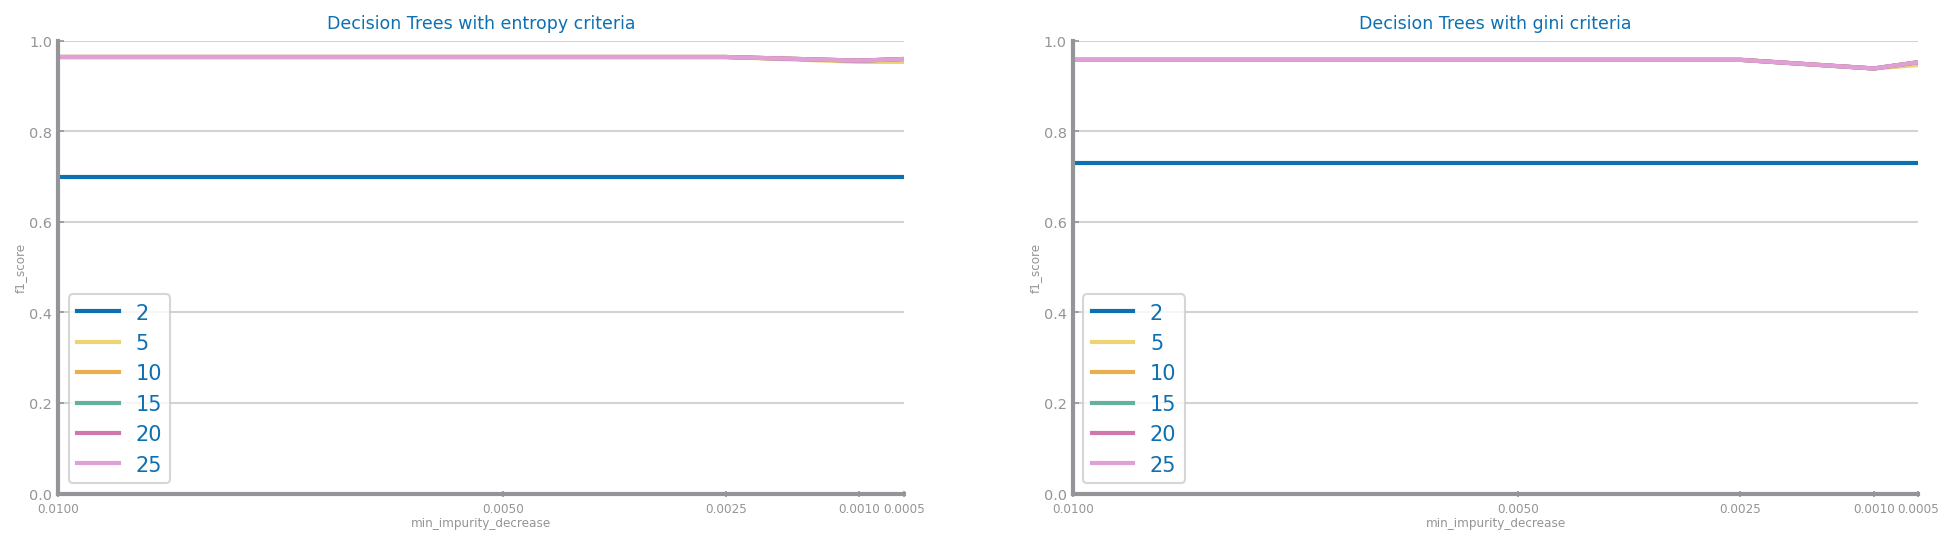

Best results achieved with entropy criteria, depth=5 and min_impurity_decrease=0.01 ==> f1_score=0.96


In [1]:
from numpy import ndarray
from pandas import DataFrame, read_csv, unique
from matplotlib.pyplot import figure, subplots, savefig, show
from sklearn.tree import DecisionTreeClassifier
from libs.ds_charts import plot_evaluation_results, multiple_line_chart
import libs.ds_charts
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

file_tag = 'air_quality_scaled_zscore'
filename = 'data/air_quality_scaled_zscore'
target = 'ALARM'

train: DataFrame = read_csv(f'{filename}_train_smote.csv')
trnY: ndarray = train.pop(target).values
trnX: ndarray = train.values
labels = unique(trnY)
labels.sort()

test: DataFrame = read_csv(f'{filename}_test.csv')
tstY: ndarray = test.pop(target).values
tstX: ndarray = test.values

min_impurity_decrease = [0.01, 0.005, 0.0025, 0.001, 0.0005]
max_depths = [2, 5, 10, 15, 20, 25]
criteria = ['entropy', 'gini']
best = ('',  0, 0.0)
last_best = 0
best_model = None

figure()
fig, axs = subplots(1, 2, figsize=(16, 4), squeeze=False)
for k in range(len(criteria)):
    f = criteria[k]
    values = {}
    for d in max_depths:
        yvalues = []
        for imp in min_impurity_decrease:
            tree = DecisionTreeClassifier(max_depth=d, criterion=f, min_impurity_decrease=imp)
            tree.fit(trnX, trnY)
            prdY = tree.predict(tstX)
            yvalues.append(f1_score(tstY, prdY, pos_label = 'Danger'))
            if yvalues[-1] > last_best:
                best = (f, d, imp)
                last_best = yvalues[-1]
                best_model = tree

        values[d] = yvalues
    multiple_line_chart(min_impurity_decrease, values, ax=axs[0, k], title=f'Decision Trees with {f} criteria',
                           xlabel='min_impurity_decrease', ylabel='f1_score', percentage=True)
savefig(f'lab5_imagens/{file_tag}_dt_study_d2_f1.png')
show()
print('Best results achieved with %s criteria, depth=%d and min_impurity_decrease=%1.2f ==> f1_score=%1.2f'%(best[0], best[1], best[2], last_best))

<Figure size 600x450 with 0 Axes>

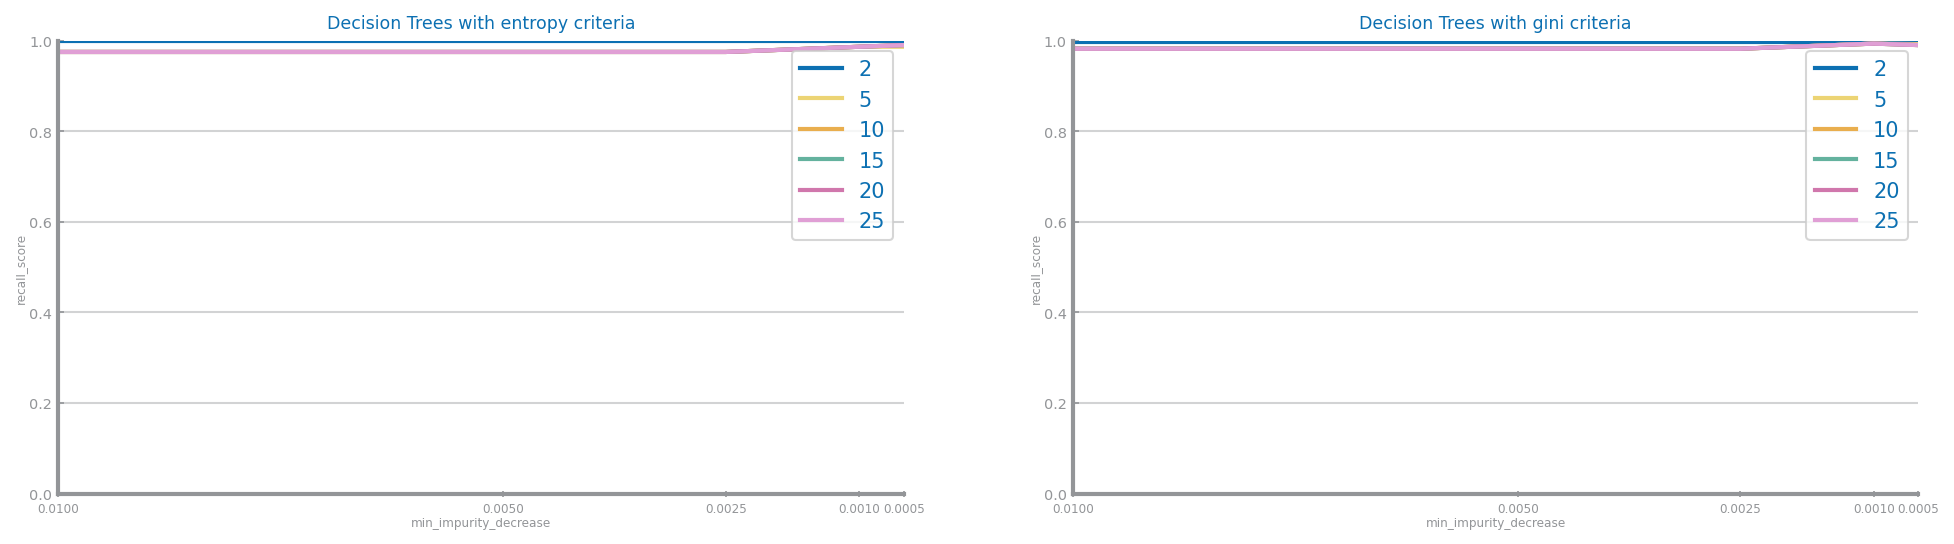

In [3]:
min_impurity_decrease = [0.01, 0.005, 0.0025, 0.001, 0.0005]
max_depths = [2, 5, 10, 15, 20, 25]
criteria = ['entropy', 'gini']
#best = ('',  0, 0.0)
#last_best = 0
#best_model = None

figure()
fig, axs = subplots(1, 2, figsize=(16, 4), squeeze=False)
for k in range(len(criteria)):
    f = criteria[k]
    values = {}
    for d in max_depths:
        yvalues = []
        for imp in min_impurity_decrease:
            tree = DecisionTreeClassifier(max_depth=d, criterion=f, min_impurity_decrease=imp)
            tree.fit(trnX, trnY)
            prdY = tree.predict(tstX)
            yvalues.append(recall_score(tstY, prdY, pos_label = 'Danger'))

        values[d] = yvalues
    multiple_line_chart(min_impurity_decrease, values, ax=axs[0, k], title=f'Decision Trees with {f} criteria',
                           xlabel='min_impurity_decrease', ylabel='recall_score', percentage=True)
savefig(f'lab5_imagens/{file_tag}_dt_study_d2_recall.png')
show()
#print('Best results achieved with %s criteria, depth=%d and min_impurity_decrease=%1.2f ==> accuracy=%1.2f'%(best[0], best[1], best[2], last_best))

<Figure size 600x450 with 0 Axes>

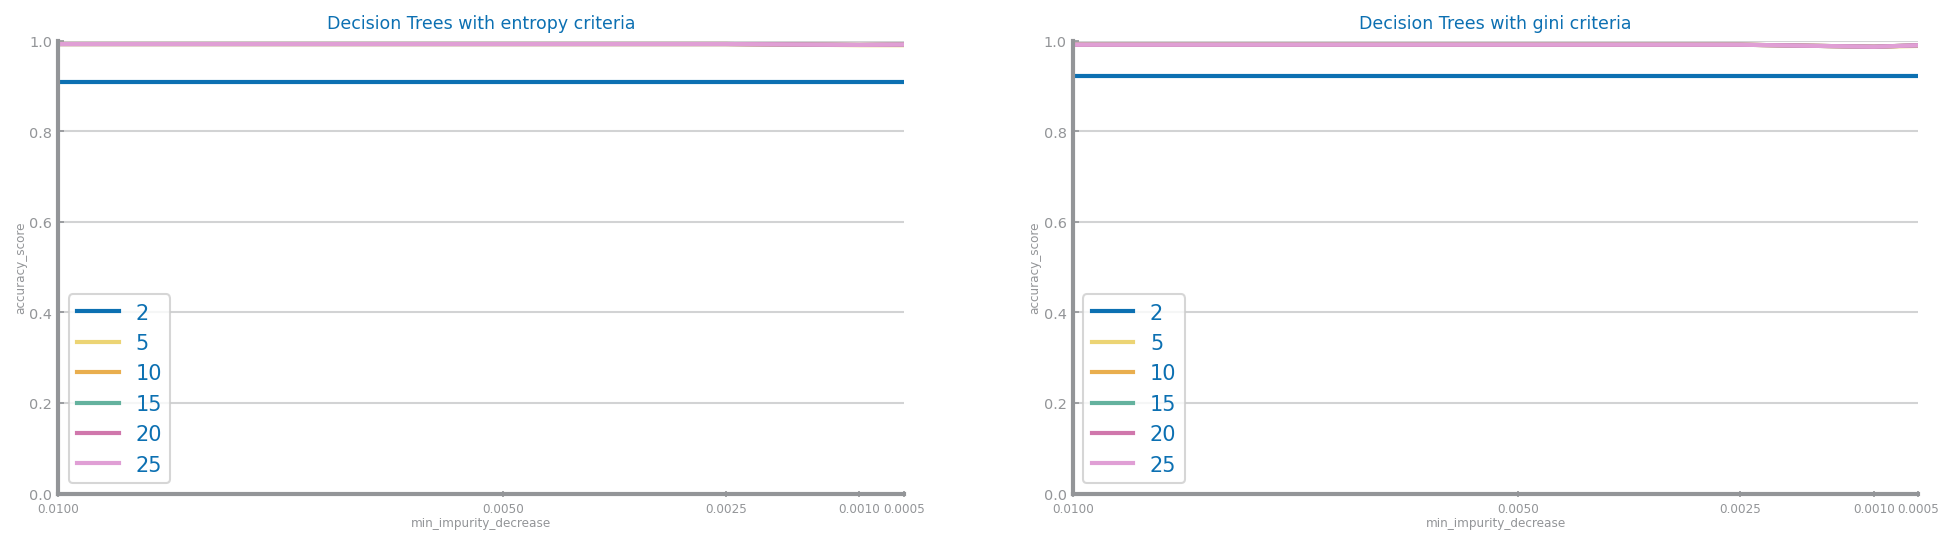

In [4]:
min_impurity_decrease = [0.01, 0.005, 0.0025, 0.001, 0.0005]
max_depths = [2, 5, 10, 15, 20, 25]
criteria = ['entropy', 'gini']
#best = ('',  0, 0.0)
#last_best = 0
#best_model = None

figure()
fig, axs = subplots(1, 2, figsize=(16, 4), squeeze=False)
for k in range(len(criteria)):
    f = criteria[k]
    values = {}
    for d in max_depths:
        yvalues = []
        for imp in min_impurity_decrease:
            tree = DecisionTreeClassifier(max_depth=d, criterion=f, min_impurity_decrease=imp)
            tree.fit(trnX, trnY)
            prdY = tree.predict(tstX)
            yvalues.append(accuracy_score(tstY, prdY))
        values[d] = yvalues
    multiple_line_chart(min_impurity_decrease, values, ax=axs[0, k], title=f'Decision Trees with {f} criteria',
                           xlabel='min_impurity_decrease', ylabel='accuracy_score', percentage=True)
savefig(f'lab5_imagens/{file_tag}_dt_d2_study_accuracy.png')
show()
#print('Best results achieved with %s criteria, depth=%d and min_impurity_decrease=%1.2f ==> accuracy=%1.2f'%(best[0], best[1], best[2], last_best))

<Figure size 600x450 with 0 Axes>

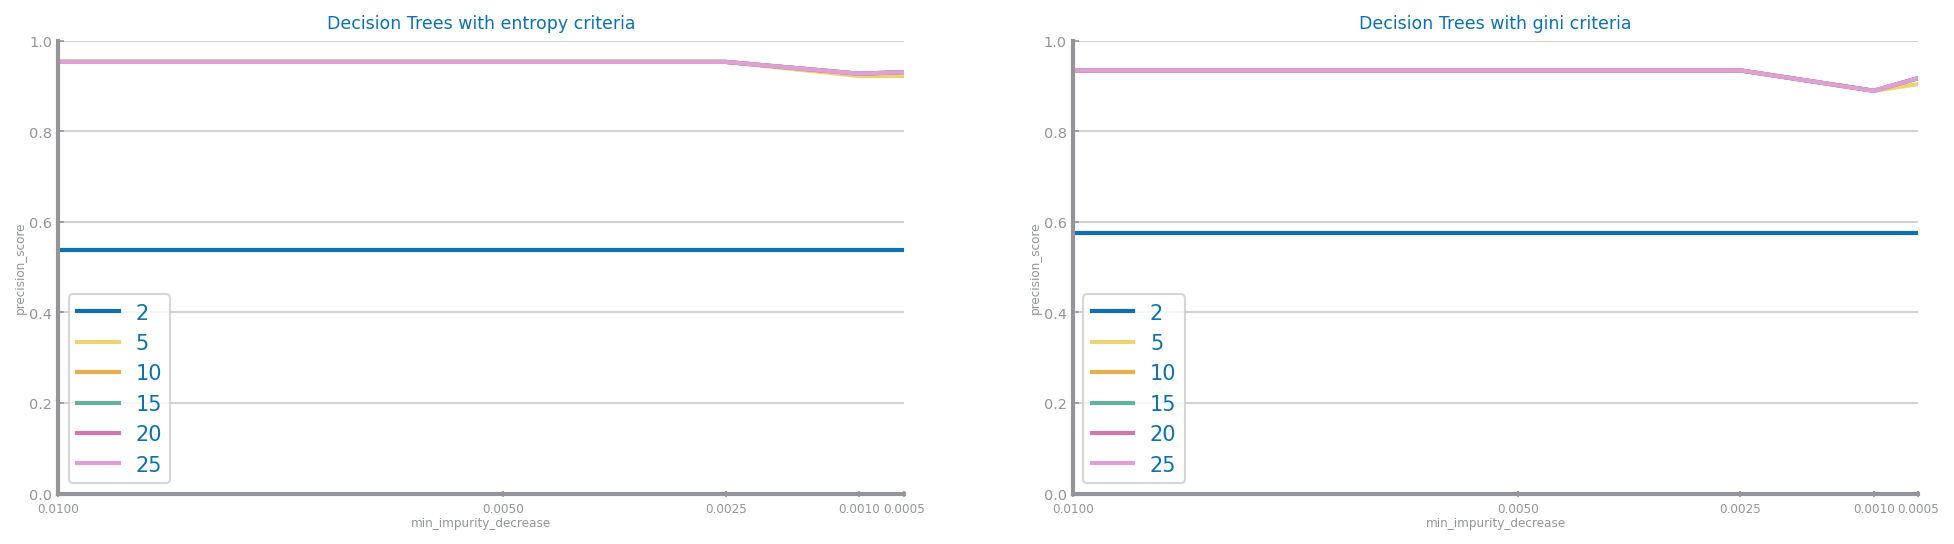

In [5]:
min_impurity_decrease = [0.01, 0.005, 0.0025, 0.001, 0.0005]
max_depths = [2, 5, 10, 15, 20, 25]
criteria = ['entropy', 'gini']
#best = ('',  0, 0.0)
#last_best = 0
#best_model = None

figure()
fig, axs = subplots(1, 2, figsize=(16, 4), squeeze=False)
for k in range(len(criteria)):
    f = criteria[k]
    values = {}
    for d in max_depths:
        yvalues = []
        for imp in min_impurity_decrease:
            tree = DecisionTreeClassifier(max_depth=d, criterion=f, min_impurity_decrease=imp)
            tree.fit(trnX, trnY)
            prdY = tree.predict(tstX)
            yvalues.append(precision_score(tstY, prdY, pos_label = 'Danger'))
        values[d] = yvalues
    multiple_line_chart(min_impurity_decrease, values, ax=axs[0, k], title=f'Decision Trees with {f} criteria',
                           xlabel='min_impurity_decrease', ylabel='precision_score', percentage=True)
savefig(f'lab5_imagens/{file_tag}_dt_d2_study_precision.png')
show()
#print('Best results achieved with %s criteria, depth=%d and min_impurity_decrease=%1.2f ==> accuracy=%1.2f'%(best[0], best[1], best[2], last_best))

### Confusion Matrix of the Best Model

entropy
2
0.01


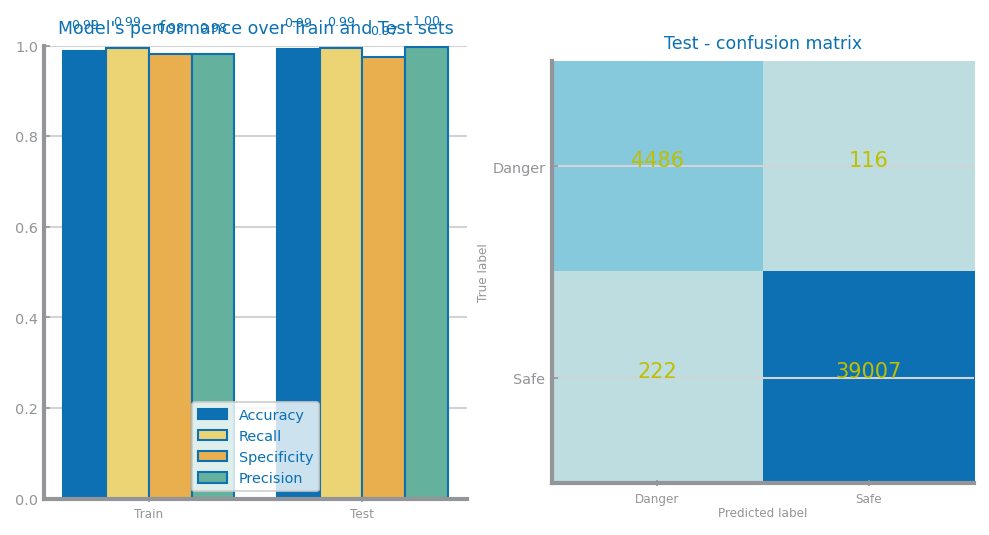

In [7]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_impurity_decrease=0.01)
print(best[0])
print(best[1])
print(best[2])

clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)
plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)
savefig('lab5_imagens/air_quality_confusion_matrix_best_tree.png')
show()

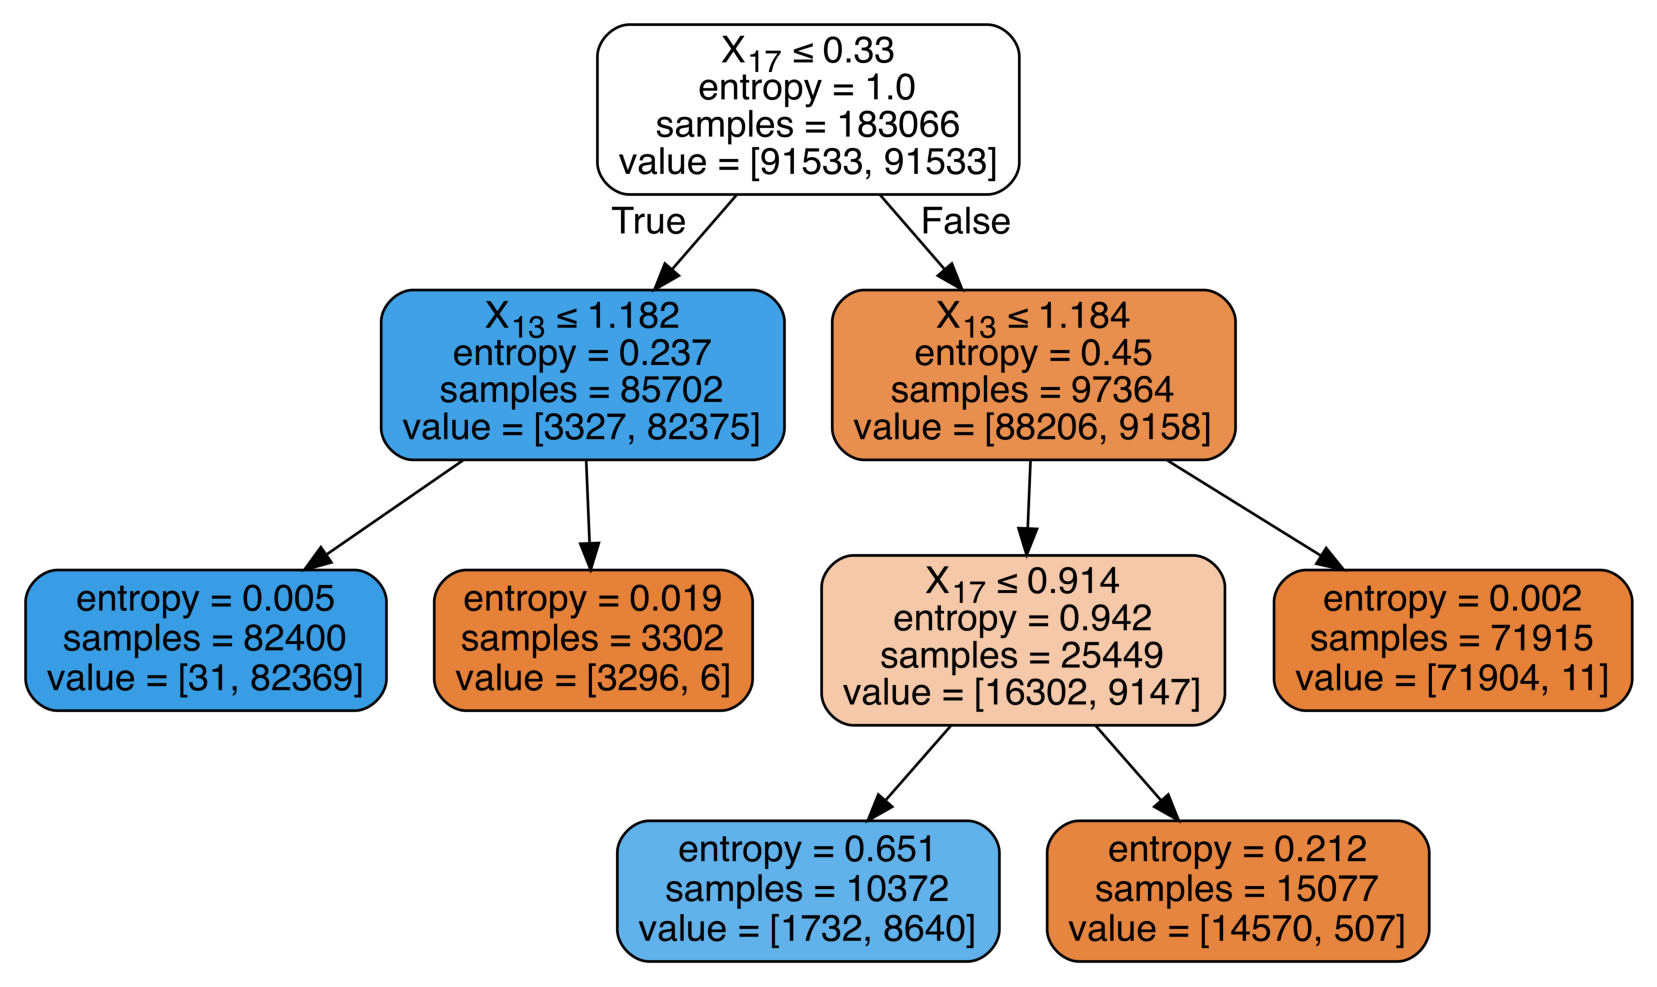

In [3]:
from sklearn.tree import export_graphviz
from matplotlib.pyplot import imread, imshow, axis

file_tree = 'lab5_imagens/best_tree_d2.png'

dot_data = export_graphviz(best_model, out_file='lab5_imagens/best_tree_d2.dot', filled=True, rounded=True, special_characters=True)
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'lab5_imagens/best_tree_d2.dot', '-o', file_tree, '-Gdpi=600'])

figure(figsize = (14, 18))
imshow(imread(file_tree))
axis('off')
show()

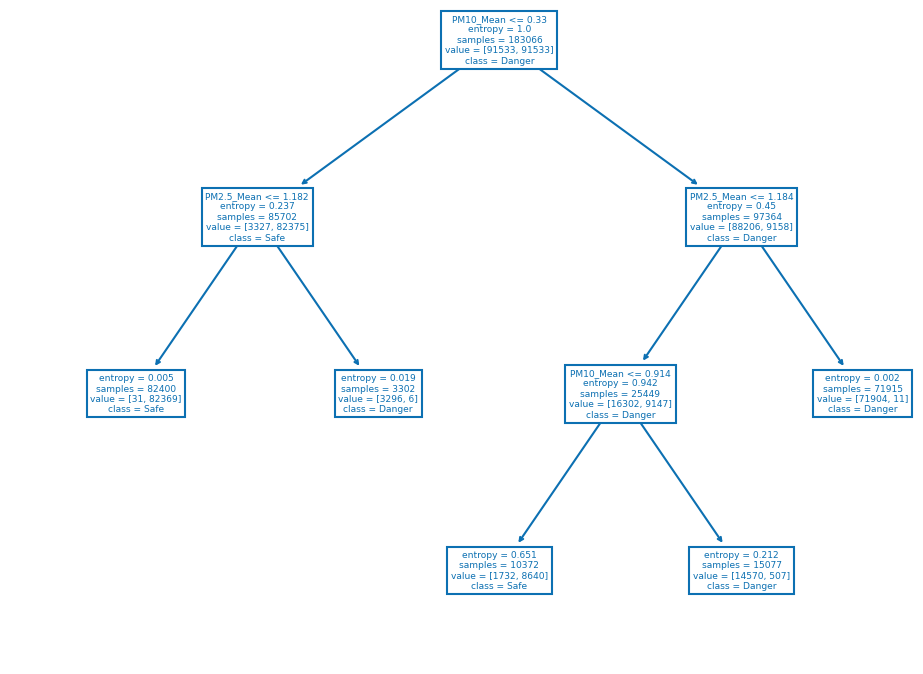

In [4]:
from sklearn import tree

labels = [str(value) for value in labels]
tree.plot_tree(best_model, feature_names=train.columns, class_names=labels)
savefig(f'lab5_imagens/{file_tag}_dt_best_tree.png')

1. feature PM10_Mean (0.770974528376741)
2. feature PM2.5_Mean (0.22902547162325904)
3. feature date_12 (0.0)
4. feature SO2_Std (0.0)
5. feature PM10_Max (0.0)
6. feature PM10_Std (0.0)
7. feature SO2_Mean (0.0)
8. feature SO2_Min (0.0)
9. feature SO2_Max (0.0)
10. feature Prov_EN_Anhui (0.0)
11. feature Prov_EN_Beijing (0.0)
12. feature Prov_EN_Chongqing (0.0)
13. feature Prov_EN_Fujian (0.0)
14. feature Prov_EN_Gansu (0.0)
15. feature Prov_EN_Guangdong (0.0)
16. feature Prov_EN_Guangxi (0.0)
17. feature PM10_Min (0.0)
18. feature PM2.5_Std (0.0)
19. feature date_11 (0.0)
20. feature PM2.5_Max (0.0)
21. feature PM2.5_Min (0.0)
22. feature O3_Std (0.0)
23. feature O3_Max (0.0)
24. feature O3_Min (0.0)
25. feature O3_Mean (0.0)
26. feature NO2_Std (0.0)
27. feature NO2_Max (0.0)
28. feature NO2_Min (0.0)
29. feature NO2_Mean (0.0)
30. feature CO_Std (0.0)
31. feature CO_Max (0.0)
32. feature CO_Min (0.0)
33. feature CO_Mean (0.0)
34. feature Prov_EN_Guizhou (0.0)
35. feature Prov_EN_Ha

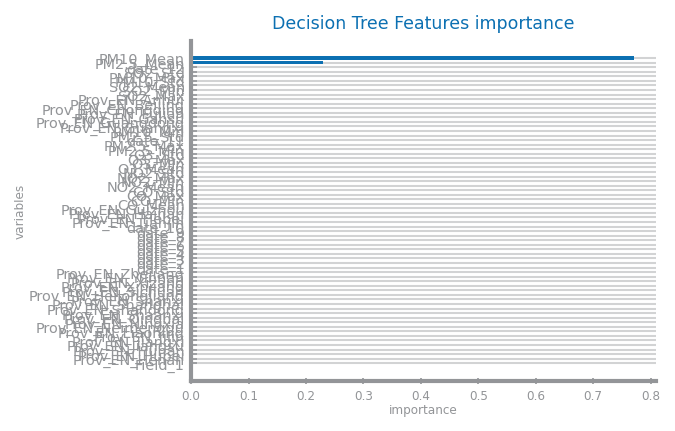

In [5]:
from numpy import argsort, arange
from libs.ds_charts import horizontal_bar_chart
from matplotlib.pyplot import Axes

variables = train.columns
importances = best_model.feature_importances_
indices = argsort(importances)[::-1]
elems = []
imp_values = []
for f in range(len(variables)):
    elems += [variables[indices[f]]]
    imp_values += [importances[indices[f]]]
    print(f'{f+1}. feature {elems[f]} ({importances[indices[f]]})')

figure()
horizontal_bar_chart(elems, imp_values, error=None, title='Decision Tree Features importance', xlabel='importance', ylabel='variables')
savefig(f'lab5_imagens/{file_tag}_dt_ranking.png')

### KNN Study

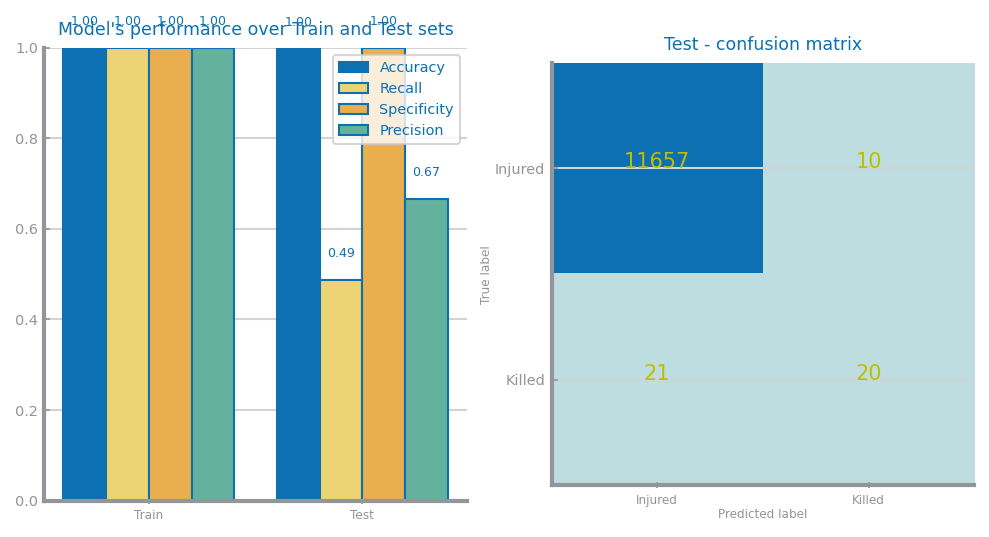

In [9]:
from sklearn.neighbors import KNeighborsClassifier

clf = knn = KNeighborsClassifier(n_neighbors=1, metric='manhattan')
clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)
plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)
show()

### Overfitting study

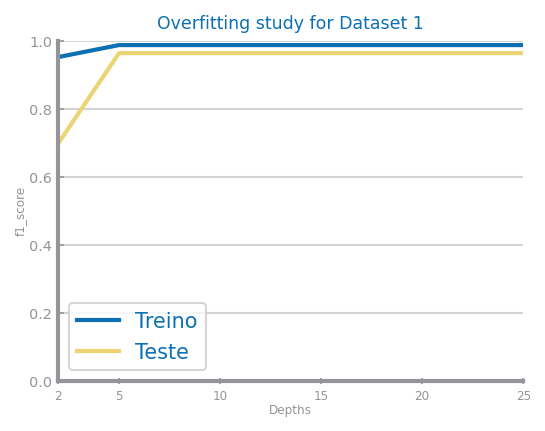

In [8]:
#min_impurity_decrease = [0.01, 0.005, 0.0025, 0.001, 0.0005]
max_depths = [2, 5, 10, 15, 20, 25]
#best = ('',  0, 0.0)
#last_best = 0
#best_model = None

figure()
f = criteria[k]
values = {}
yvalues = []
for imp in max_depths:
    tree = DecisionTreeClassifier(max_depth=imp, criterion='entropy', min_impurity_decrease=0.005)
    tree.fit(trnX, trnY)
    prdY = tree.predict(trnX)
    yvalues.append(f1_score(trnY, prdY, pos_label = 'Danger'))

values['Treino'] = yvalues
yvalues = []
for imp in max_depths:
    tree = DecisionTreeClassifier(max_depth=imp, criterion='entropy', min_impurity_decrease=0.005)
    tree.fit(trnX, trnY)
    prdY = tree.predict(tstX)
    yvalues.append(f1_score(tstY, prdY, pos_label = 'Danger'))

values['Teste'] = yvalues

multiple_line_chart(max_depths, values, title=f'Overfitting study for Dataset 1',
                           xlabel='Depths', ylabel='f1_score', percentage=True)
savefig(f'lab5_imagens/{file_tag}_overfitting_study_d2_f1.png')

show()

1
5
7
1
5
7


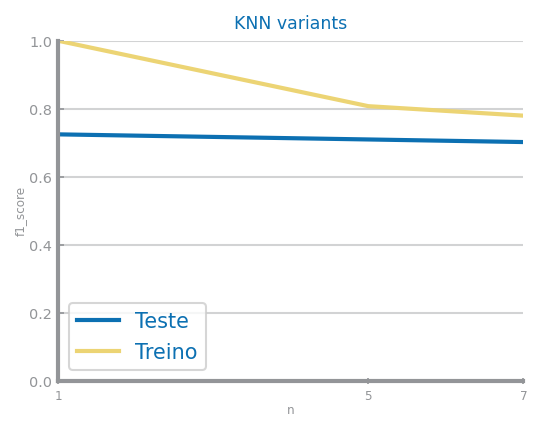

In [13]:
from numpy import ndarray
from pandas import DataFrame, read_csv, unique
from matplotlib.pyplot import figure, savefig, show
from sklearn.neighbors import KNeighborsClassifier
from libs.ds_charts import plot_evaluation_results, multiple_line_chart
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

target = 'ALARM'
filename = 'air_quality_scaled_minmax'
train: DataFrame = read_csv(f'data/{filename}_train.csv')
trnY: ndarray = train.pop(target).values
trnX: ndarray = train.values
labels = unique(trnY)
labels.sort()

test: DataFrame = read_csv(f'data/{filename}_test.csv')
tstY: ndarray = test.pop(target).values
tstX: ndarray = test.values

nvalues = [1, 5, 7]#, 9, 11, 13, 15, 17, 19]
dist = 'manhattan'
f1 = {}

yvalues_f1 = []
for n in nvalues:
    print(n)
    knn = KNeighborsClassifier(n_neighbors=n, metric=dist)
    knn.fit(trnX, trnY)
    prdY = knn.predict(tstX)
    yvalues_f1.append(f1_score(tstY, prdY, pos_label='Danger')) ## Using F1 SCORE
             
f1['Teste'] = yvalues_f1
yvalues_f1 = []
for n in nvalues:
    print(n)          
    knn = KNeighborsClassifier(n_neighbors=n, metric=dist)
    knn.fit(trnX, trnY)
    prdY = knn.predict(trnX)    
    yvalues_f1.append(f1_score(trnY, prdY, pos_label='Danger')) ## Using F1 SCORE  
f1['Treino'] = yvalues_f1

figure()
multiple_line_chart(nvalues, f1, title='KNN variants', xlabel='n', ylabel='f1_score', percentage=True)
#savefig('lab3_imagens/air_quality_minmax_knn_f1_study.png')
show()